# Labolatorium nr 5

## Import bibliotek oraz ich konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import scipy

# Matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## Zadanie 1 - Przekształcenie sfery w elpisoidę

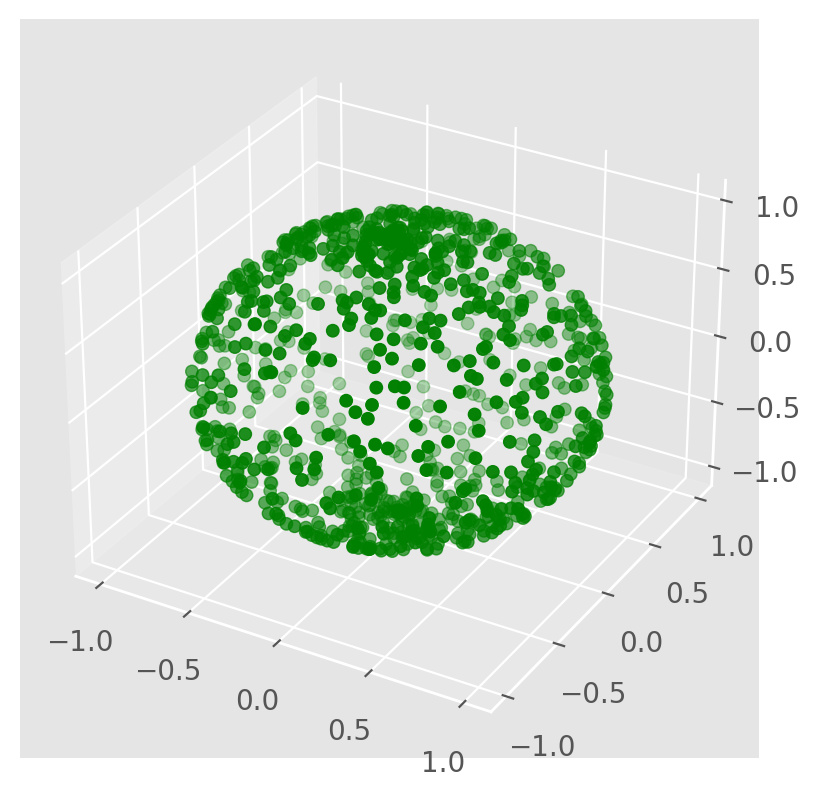

In [2]:
def v(s,t):
    return np.array([np.cos(s)*np.sin(t), np.sin(s)*np.sin(t), np.cos(t)]).T

S = np.random.uniform(0, 2*np.pi, 1000)
T = np.random.uniform(0, np.pi, 1000)

def plot_3d(points):
    fig = plt.figure()
    ax = plt.axes(projection ="3d")
    ax.scatter3D(points[:,0], points[:,1], points[:,2], color = "green")
    plt.show()

plot_3d(v(S, T))

In [3]:
A1 = np.random.random((3,3))
A2 = np.random.random((3,3))
A3 = np.random.random((3,3))

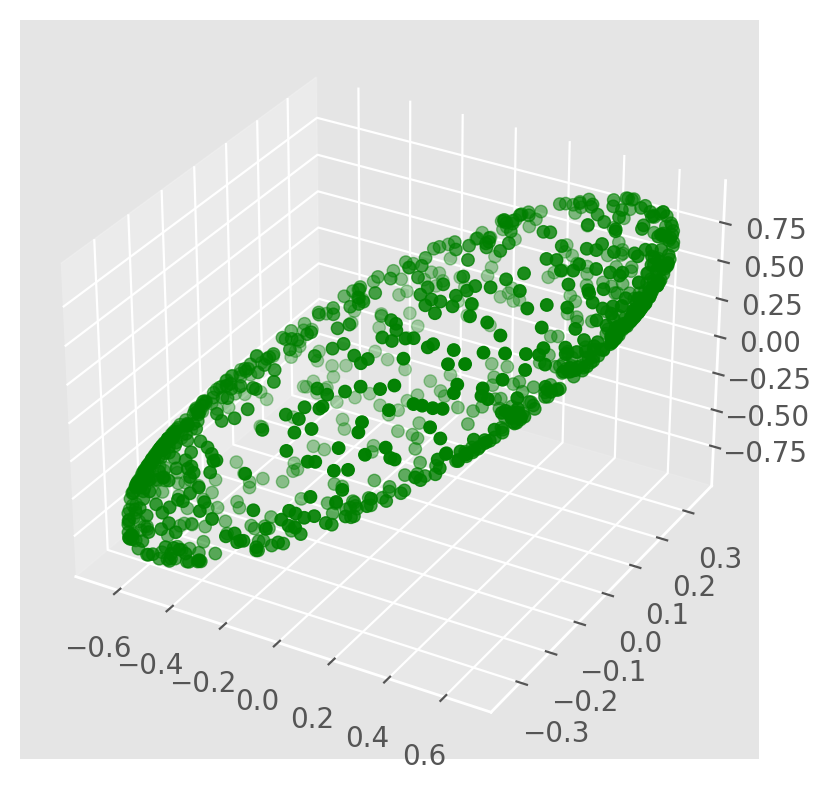

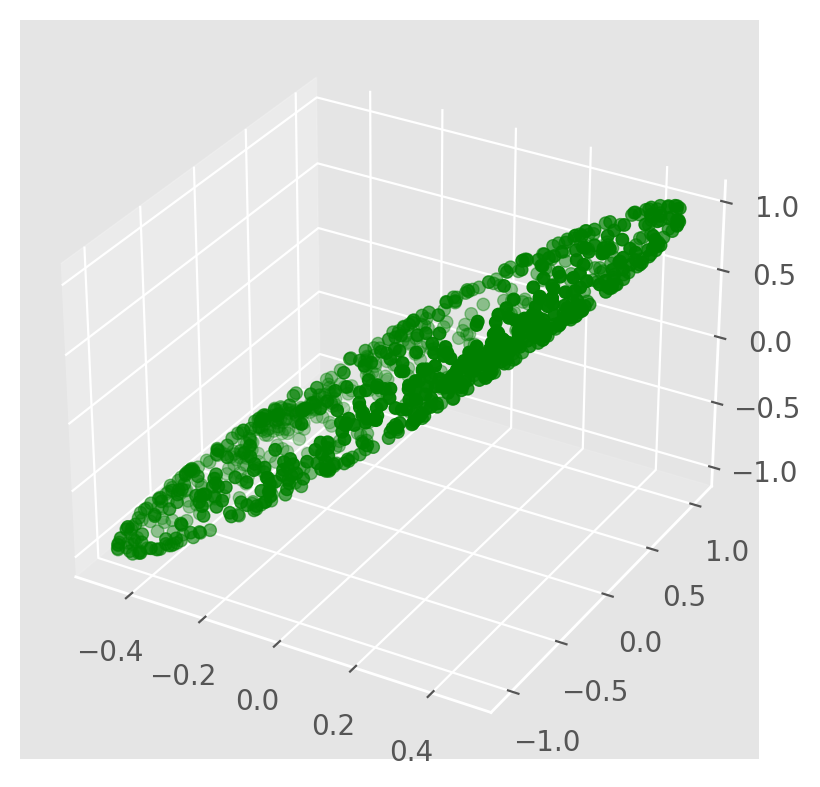

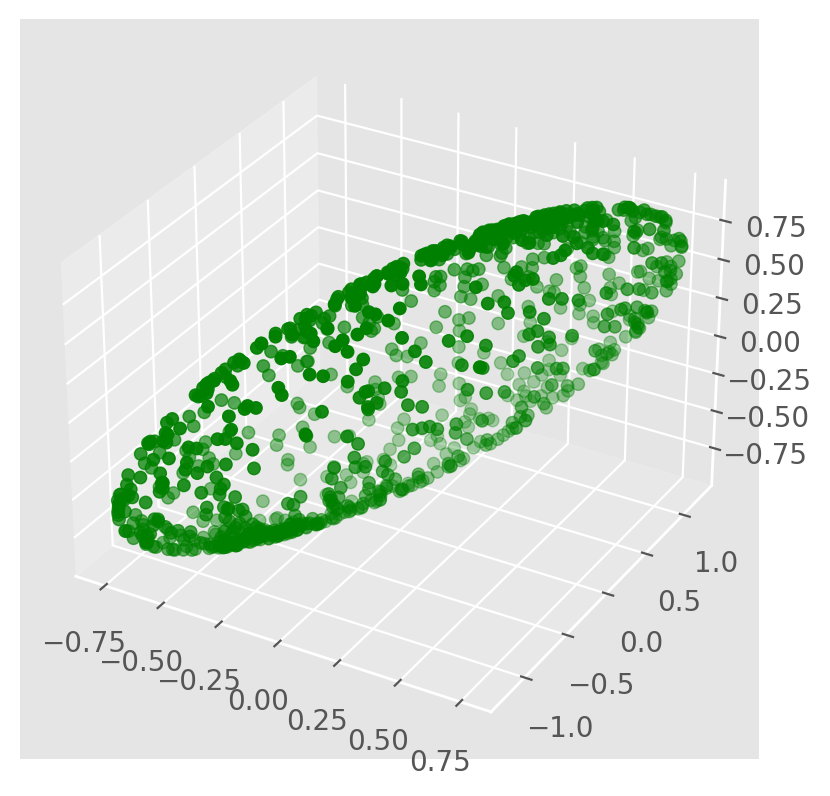

In [4]:
plot_3d(v(S, T)@A1)
plot_3d(v(S, T)@A2)
plot_3d(v(S, T)@A3)

### Wizualizacja półosi wyznaczonych za pomocą SVD

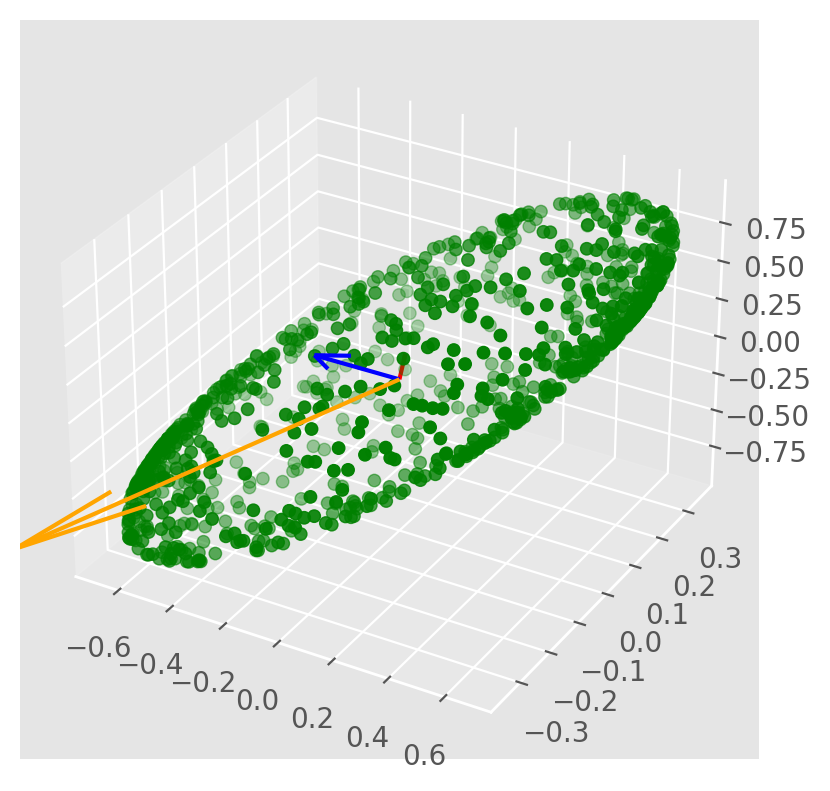

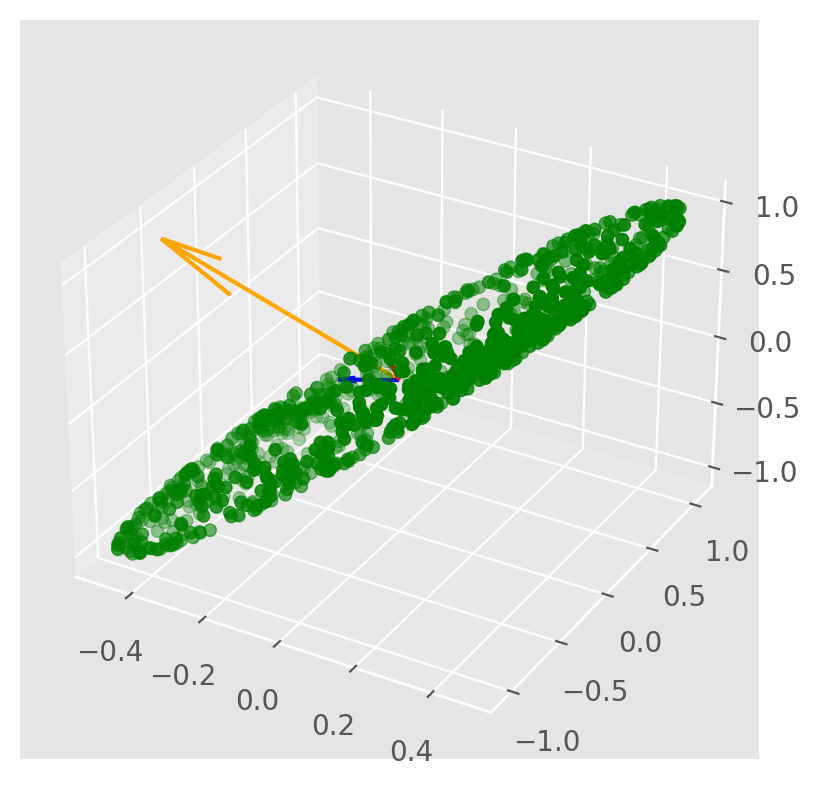

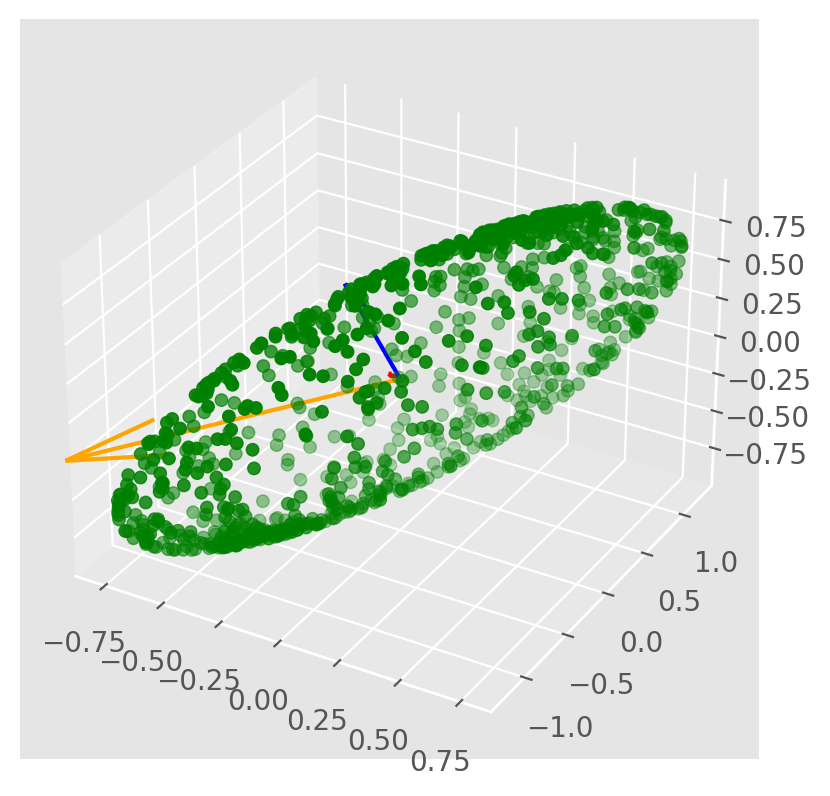

In [5]:
def plot_3d_with_axes(points, A, dd=1):
    u, s, vh = np.linalg.svd(A)
    points = points @ A

    if dd == 1:
        dd = u
    elif dd == 2:
        dd = vh

    fig = plt.figure()
    ax = plt.axes(projection ="3d")
    ax.quiver(0 ,0 ,0, dd[0,0], dd[0,1], dd[0,2], length=s[0], color = "orange")
    ax.quiver(0 ,0 ,0, dd[1,0], dd[1,1], dd[1,2], length=s[1], color = "blue")
    ax.quiver(0 ,0 ,0, dd[2,0], dd[2,1], dd[2,2], length=s[2], color = "red")
    ax.scatter3D(points[:,0], points[:,1], points[:,2], color = "green")
    plt.show()

plot_3d_with_axes(v(S, T), A1, 1)
plot_3d_with_axes(v(S, T), A2, 1)
plot_3d_with_axes(v(S, T), A3, 1)

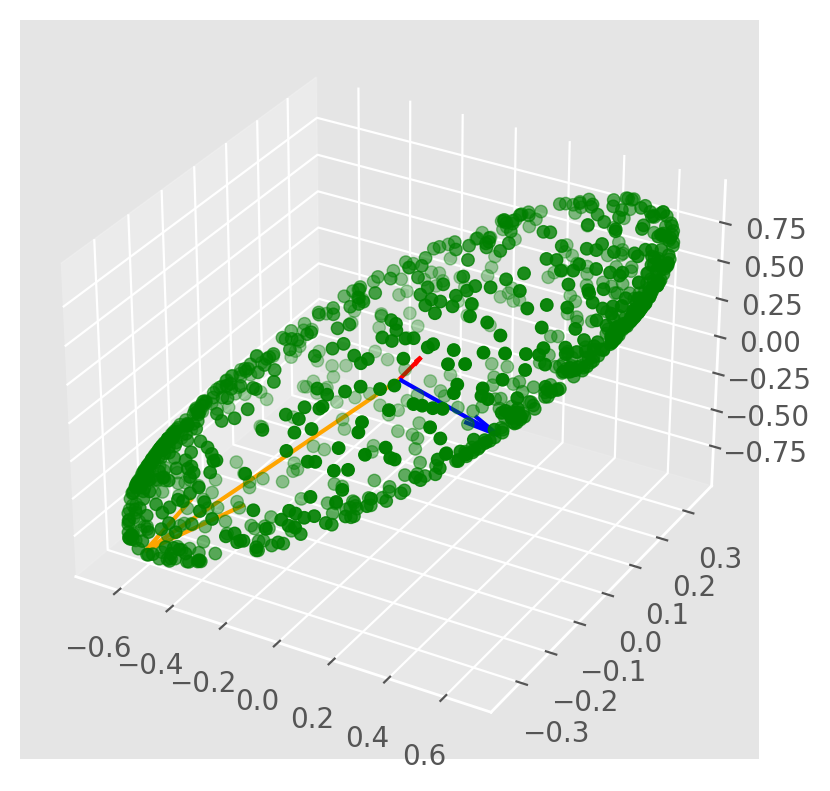

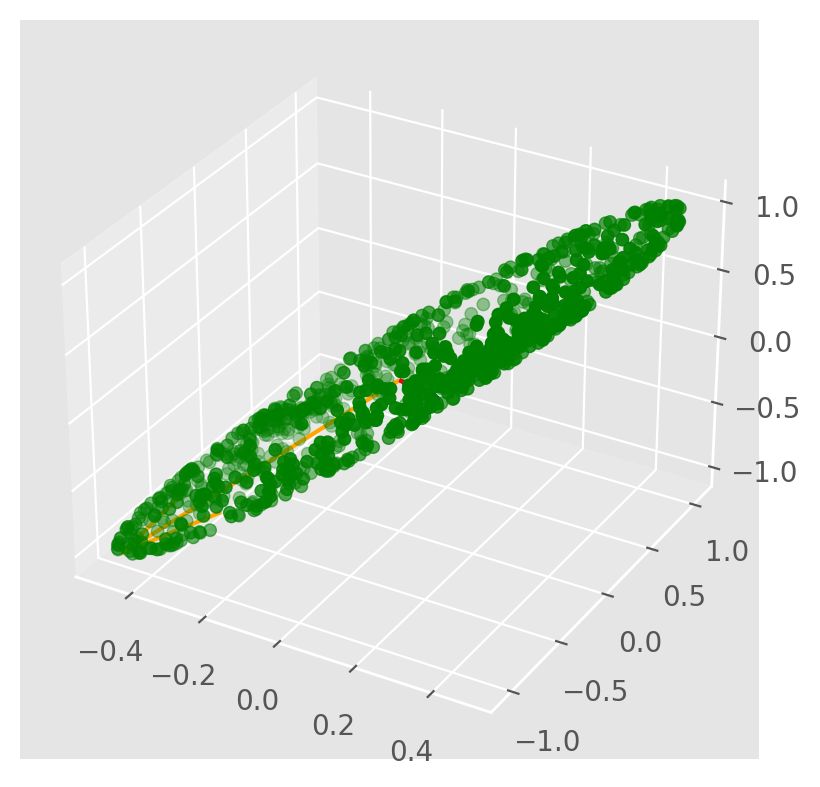

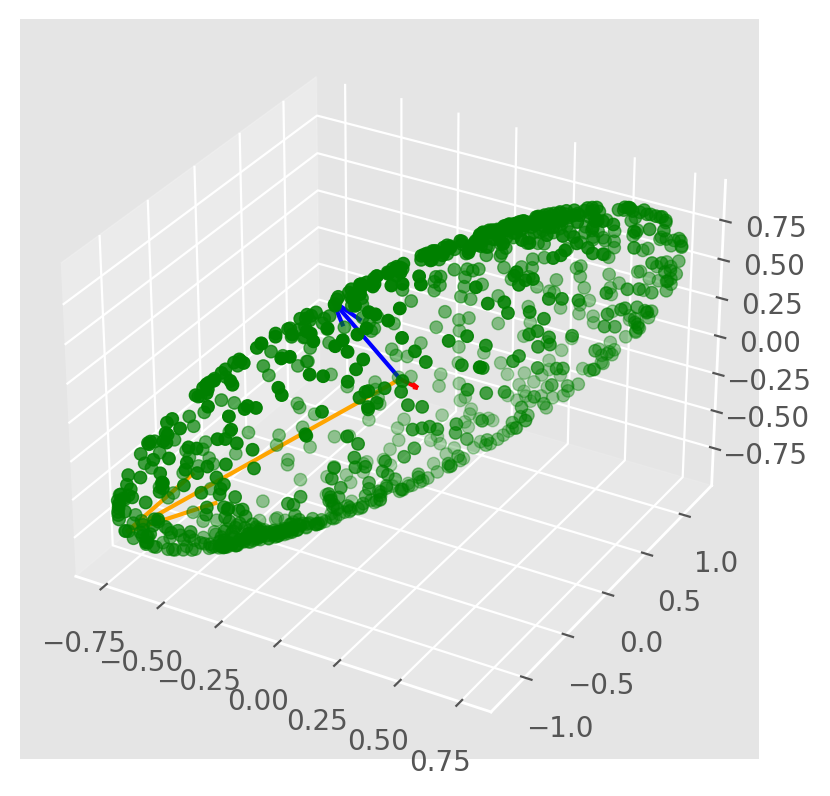

In [6]:
plot_3d_with_axes(v(S, T), A1, 2)
plot_3d_with_axes(v(S, T), A2, 2)
plot_3d_with_axes(v(S, T), A3, 2)

### Generowanie macierzy ze stosunkiem największej i najmniejszej wartości osobliwej większej od 100

In [7]:
# Find the best rotation matrix
A = np.random.random((3,3))
u, s, vh = np.linalg.svd(A)
while s[0]/s[-1] < 100:
    A = np.random.random((3,3))
    u, s, vh = np.linalg.svd(A)

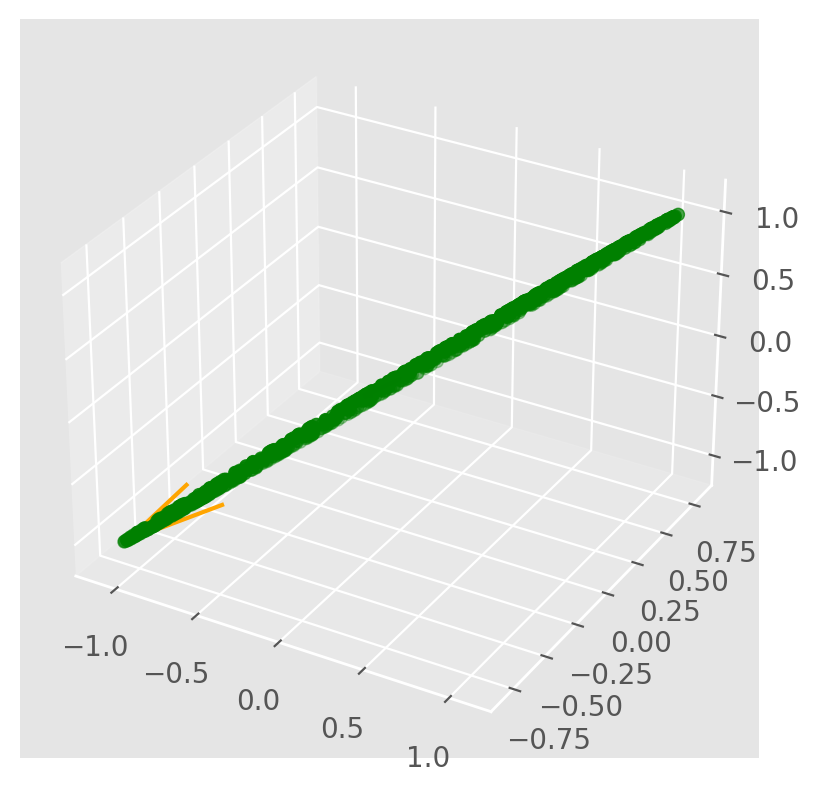

In [11]:
plot_3d_with_axes(v(S, T), A, 2)

## Zadanie 2 - Kompresja obrazu

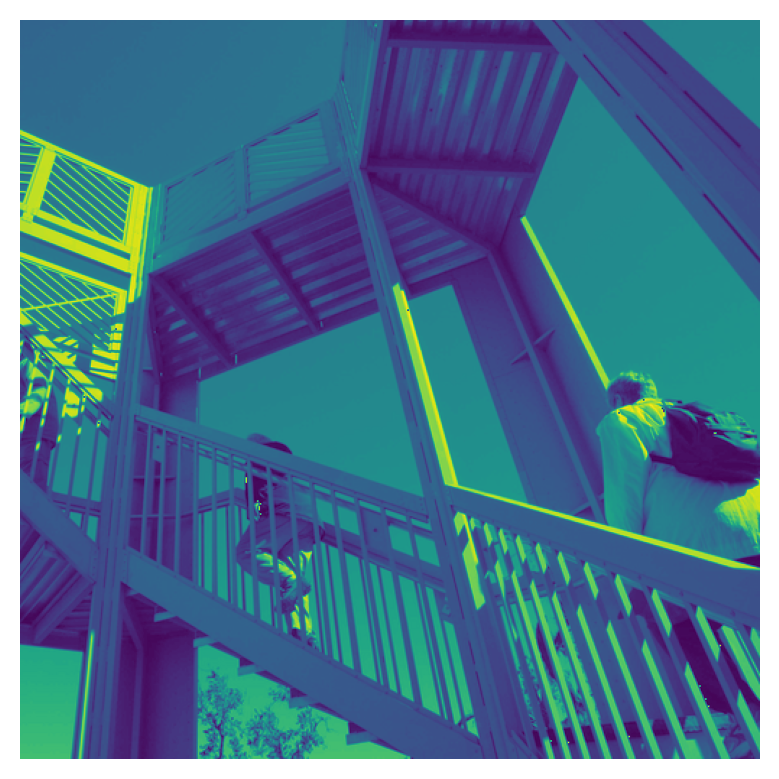

In [12]:
image = scipy.misc.ascent()

plt.axis('off')
plt.imshow(image)

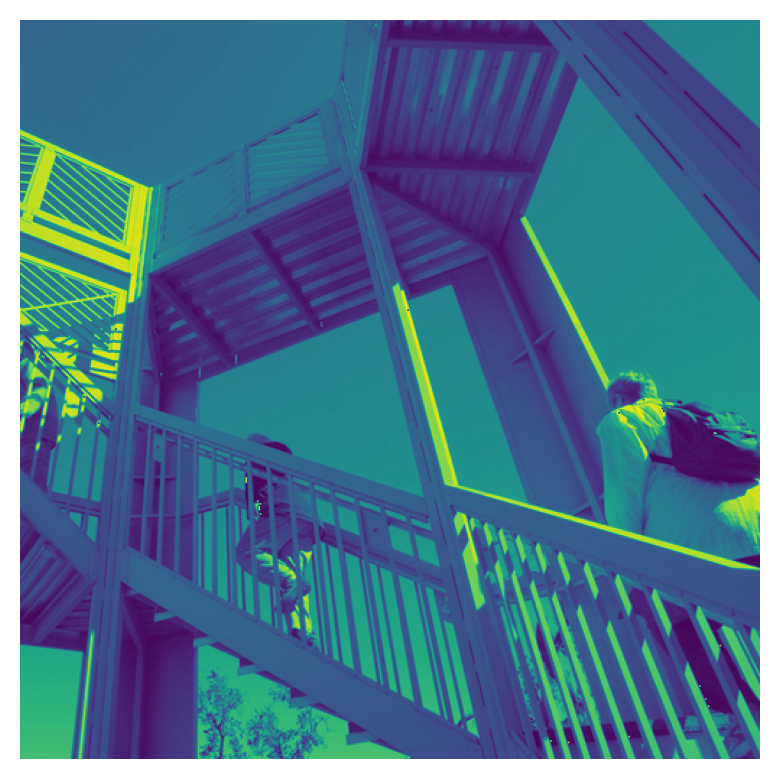

In [13]:
def compress_image(image, k):
    u,s,v = np.linalg.svd(image)

    # s = np.identity(len(s)) * s

    # for i in range(k, len(s)):
    #     s[i][i] = 0

    # return u@s@v

    A = np.zeros((len(u), len(v)))

    for i in range(k):
        A += s[i] * np.outer(u.T[i], v[i])

    return A

plt.axis('off')
plt.imshow(compress_image(image, len(image)))

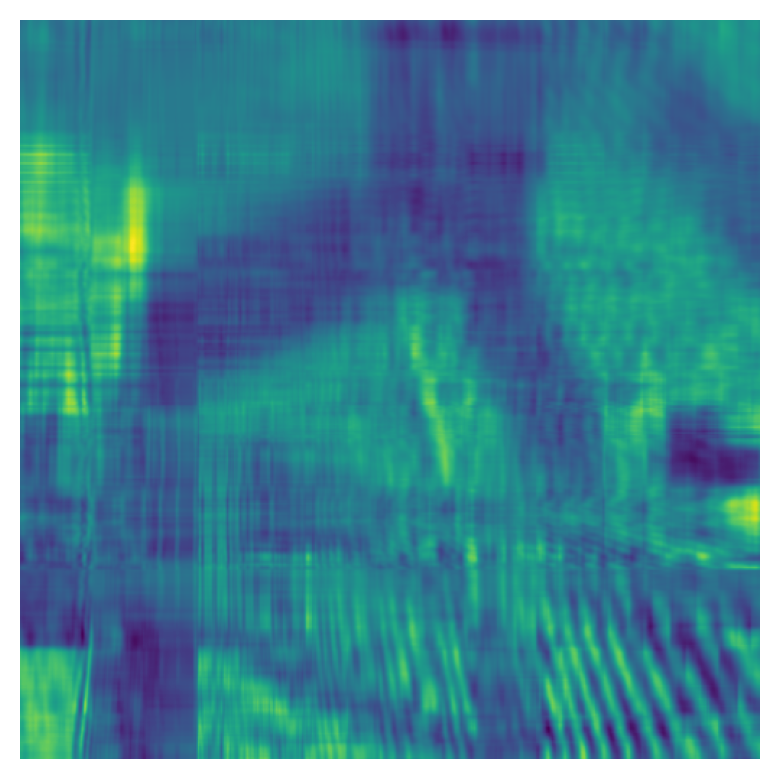

In [14]:
plt.axis('off')
plt.imshow(compress_image(image, 10))

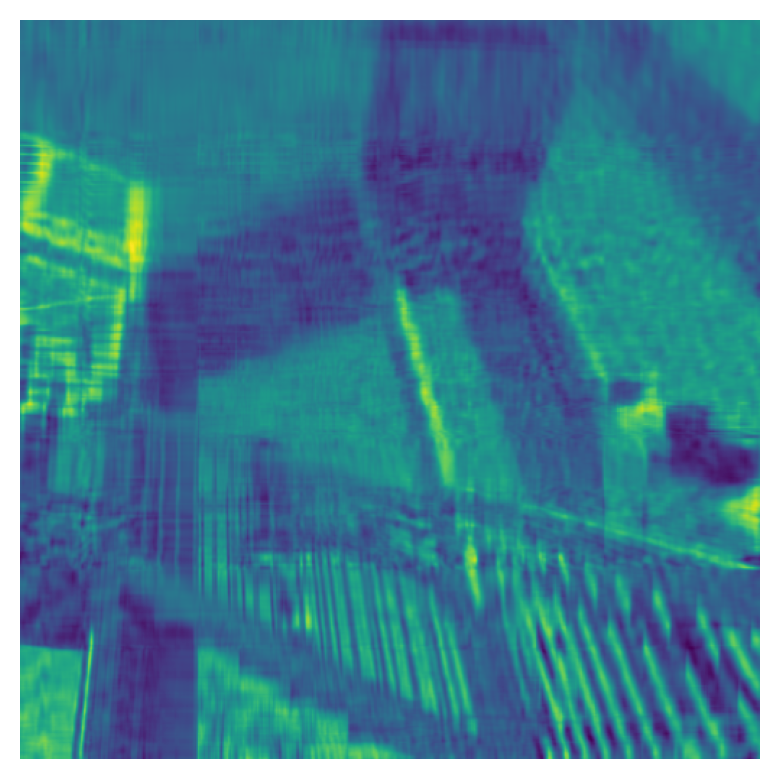

In [23]:
plt.axis('off')
plt.imshow(compress_image(image, 20))

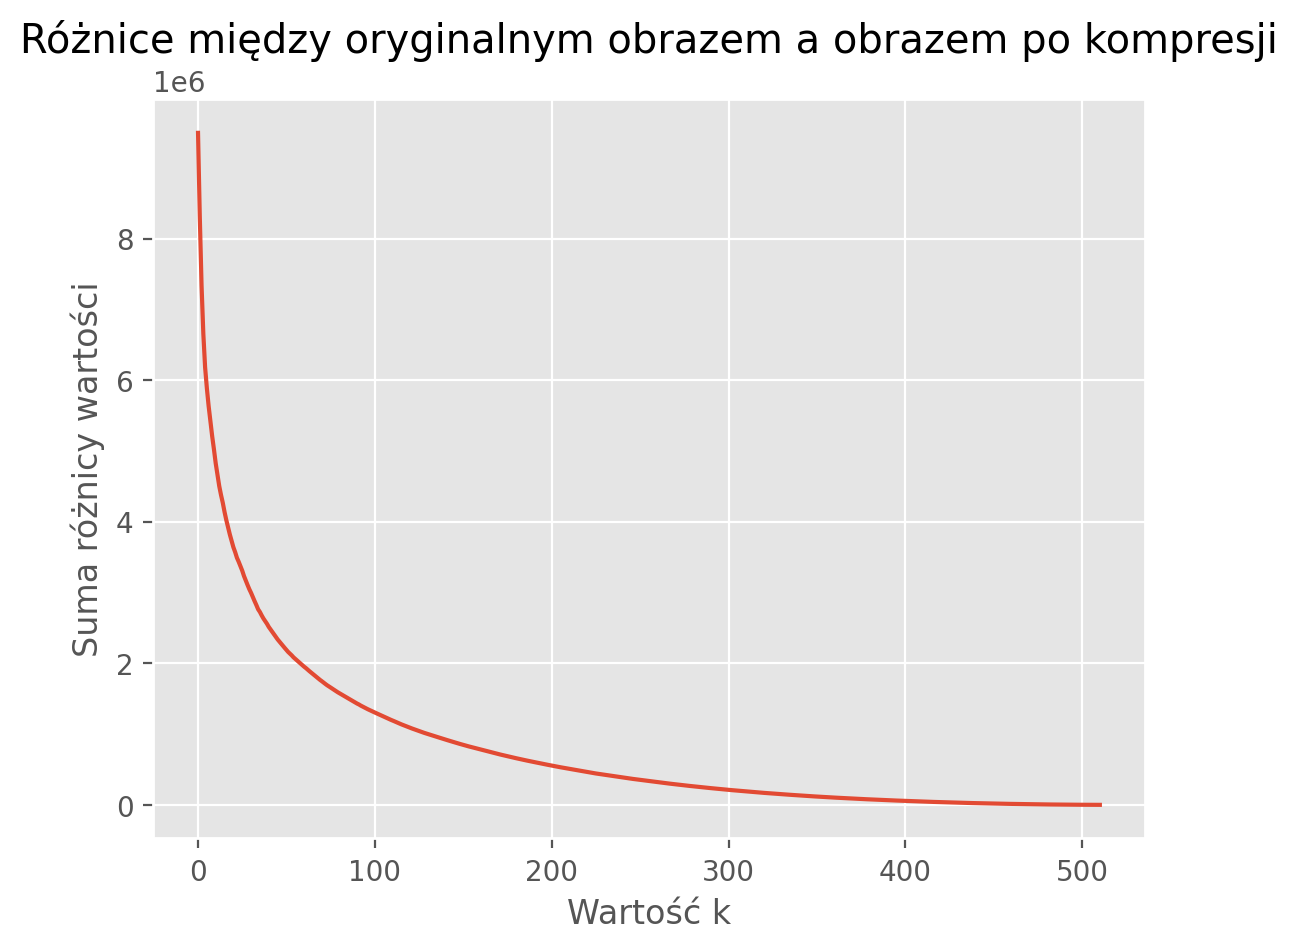

In [27]:
def run_tests(image):
    results = []
    for i in range(1, len(image)):
        results.append(np.abs(image - compress_image(image, i)).sum())

    plt.title("Różnice między oryginalnym obrazem a obrazem po kompresji")
    plt.ylabel("Suma różnicy wartości")
    plt.xlabel("Wartość k")
    plt.plot(results)
    plt.show()

run_tests(image)